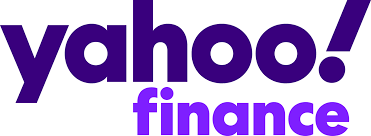

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
df= pd.read_csv(r"C:\Users\dell\Downloads\yahoo Finanace_industry - Stock Market.csv")

In [33]:
df.head(10)

,Symbol,Name,Price,Change,market cap,PE_ratio
0,BRK-B,Berkshire Hathaway Inc.,321.26,-1.38,709.361B,NaN
1,V,Visa Inc.,230.76,-0.25,483.304B,30.81
2,JPM,JPMorgan Chase & Co.,133.89,-2.16,392.325B,9.90
3,MA,Mastercard Incorporated,380.21,-3.18,359.338B,37.85
4,JPM-PD,JPMorgan Chase & Co.,24.57,-0.08,326.427B,1.82
5,JPM-PC,JPMorgan Chase & Co.,25.02,-0.09,328.207B,1.86
6,BAC-PK,Bank of America Corporation,24.38,-0.04,244.596B,6.94
7,BAC-PL,Bank of America Corporation,"1,144.76",0.79,0,325.77
8,BML-PG,Bank of America Corporation,20.02,-0.03,270.35B,5.70
9,BML-PH,Bank of America Corporation,19.90,0.05,269.812B,5.66


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      1250 non-null   object 
 1   Name        1250 non-null   object 
 2   Price       1250 non-null   object 
 3   Change      1250 non-null   float64
 4   market cap  1250 non-null   object 
 5   PE_ratio    1235 non-null   float64
dtypes: float64(2), object(4)
memory usage: 58.7+ KB


In [35]:
df['PE_ratio'] = df['PE_ratio'].fillna(df['PE_ratio'].mean())

In [36]:
df.drop_duplicates(inplace = True)

In [37]:
df

,Symbol,Name,Price,Change,market cap,PE_ratio
0,BRK-B,Berkshire Hathaway Inc.,321.26,-1.38,709.361B,21.220227
1,V,Visa Inc.,230.76,-0.25,483.304B,30.810000
2,JPM,JPMorgan Chase & Co.,133.89,-2.16,392.325B,9.900000
3,MA,Mastercard Incorporated,380.21,-3.18,359.338B,37.850000
4,JPM-PD,JPMorgan Chase & Co.,24.57,-0.08,326.427B,1.820000
...,...,...,...,...,...,...
1239,BN,Brookfield Corporation,30.25,-0.95,49.475B,25.430000
1243,USB,U.S. Bancorp,29.16,0.24,45.496B,7.940000
1244,PNC,"The PNC Financial Services Group, Inc.",111.18,-1.52,45.538B,7.700000
1246,BBVA,"Banco Bilbao Vizcaya Argentaria, S.A.",7.16,0.04,42.985B,5.970000


# Eda

In [38]:
df['Name'].value_counts()

Wells Fargo & Company                     31
Morgan Stanley                            27
The Goldman Sachs Group, Inc.             24
The Charles Schwab Corporation            22
PayPal Holdings, Inc.                     21
Bank of America Corporation               20
Citigroup Inc.                            19
The Progressive Corporation               19
CME Group Inc.                            16
Blackstone Inc.                           15
American Express Company                  15
Intercontinental Exchange, Inc.           12
KKR & Co. Inc.                            12
BlackRock, Inc.                           12
Moody's Corporation                       11
Marsh & McLennan Companies, Inc.          11
Chubb Limited                             11
S&P Global Inc.                           10
Brookfield Corporation                    10
The Toronto-Dominion Bank                  9
HDFC Bank Limited                          9
U.S. Bancorp                               8
Aon plc   

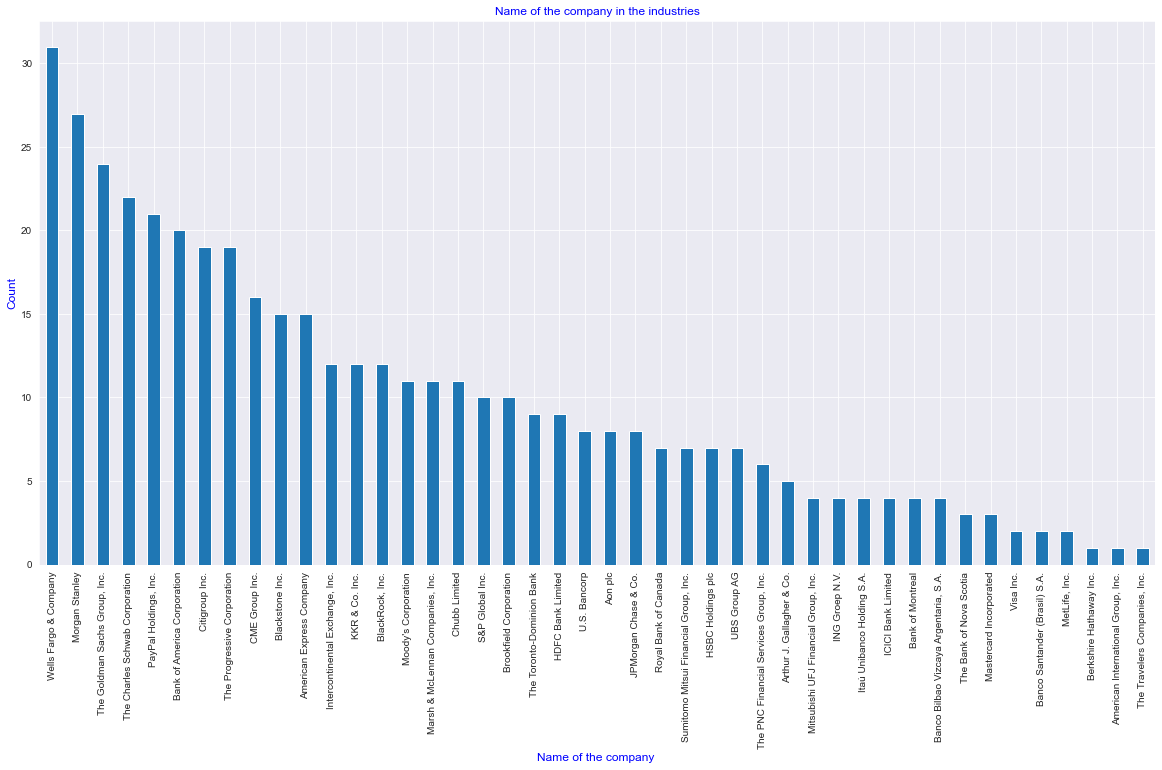

In [39]:
sns.set_style('darkgrid')
df['Name'].value_counts().plot(kind = 'bar', figsize = (20,10))
plt.title('Name of the company in the industries',fontsize = 12 , c = 'b')
plt.xlabel('Name of the company ', fontsize = 12 , c = 'b')
plt.ylabel('Count' , fontsize = 12, c = 'b')
plt.xticks(rotation = 90)
plt.show()

In [69]:
df['market cap'].dtype

dtype('float64')

In [70]:
df['market cap'] = df['market cap'].replace('B','e9', regex = True)

df['market cap'] = df['market cap'].astype(float)

sym_marketcap = df.groupby('Name')['market cap'].sum().sort_values(ascending = False)
sym_marketcap

Name
Wells Fargo & Company                     4.840466e+12
Bank of America Corporation               4.376324e+12
Morgan Stanley                            3.027912e+12
JPMorgan Chase & Co.                      2.814763e+12
The Goldman Sachs Group, Inc.             2.144700e+12
The Charles Schwab Corporation            1.919144e+12
Citigroup Inc.                            1.800606e+12
American Express Company                  1.655892e+12
PayPal Holdings, Inc.                     1.520853e+12
The Progressive Corporation               1.504761e+12
Blackstone Inc.                           1.483577e+12
BlackRock, Inc.                           1.181366e+12
S&P Global Inc.                           1.148599e+12
HDFC Bank Limited                         1.135607e+12
Mastercard Incorporated                   1.078300e+12
CME Group Inc.                            1.072564e+12
HSBC Holdings plc                         1.058249e+12
The Toronto-Dominion Bank                 1.007184e+12
Marsh

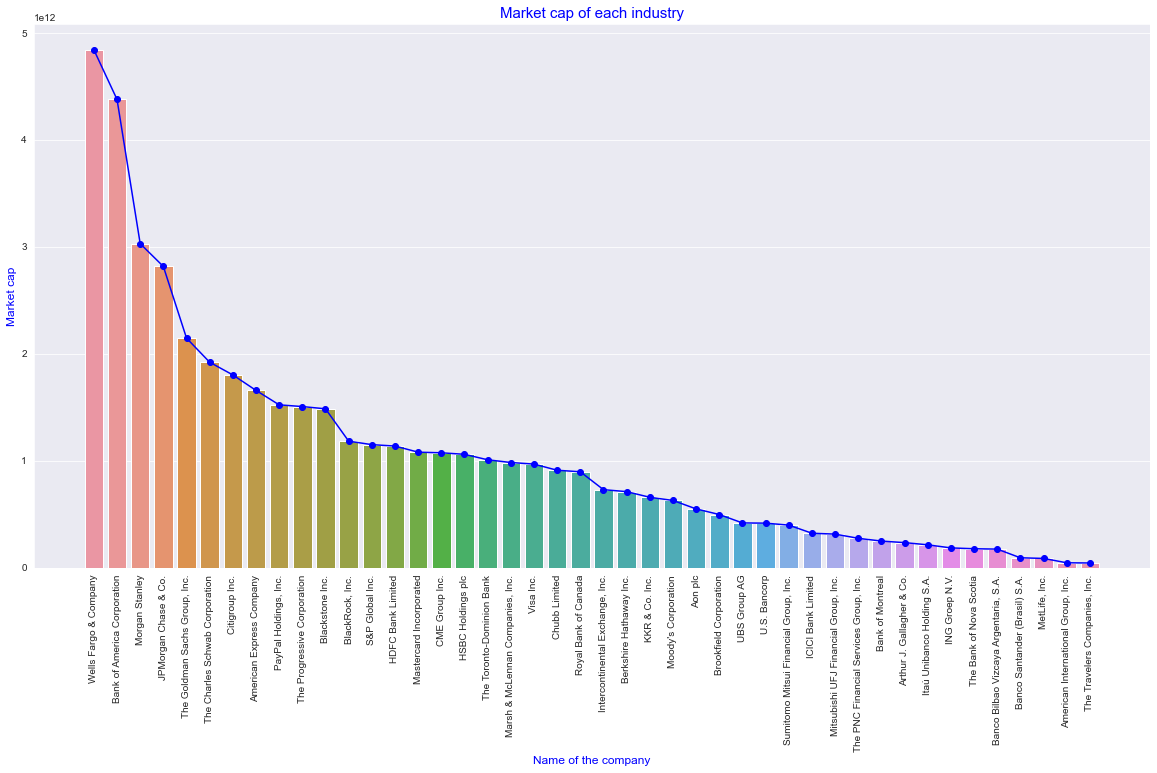

In [71]:
plt.figure(figsize=(20, 10))
sns.barplot(x=sym_marketcap.index, y=sym_marketcap.values)
plt.plot(sym_marketcap.index, sym_marketcap.values, marker='o', color='b')
plt.title('Market cap of each industry', fontsize=15, c='b')
plt.xlabel('Name of the company', fontsize=12, c='b')
plt.ylabel('Market cap', fontsize=12, c='b')
plt.xticks(rotation=90)
plt.show();

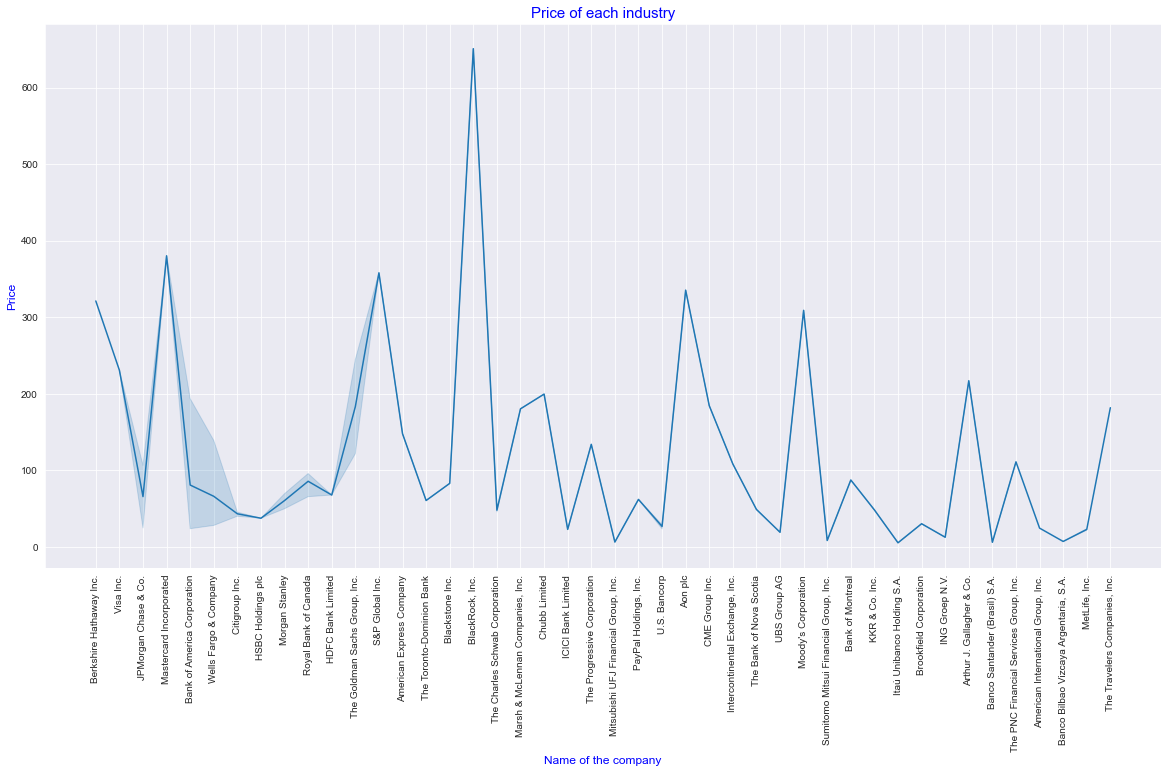

In [73]:
# price
df['Price'] = df['Price'].replace(',', '')
df['Price'] = df['Price'].astype(float)
plt.figure(figsize=(20, 10))
sns.lineplot(x='Name', y='Price', data=df)
plt.title('Price of each industry', fontsize=15, c='b')
plt.xlabel('Name of the company', fontsize=12, c='b')
plt.ylabel('Price', fontsize=12, c='b')
plt.xticks(rotation=90)
plt.show();

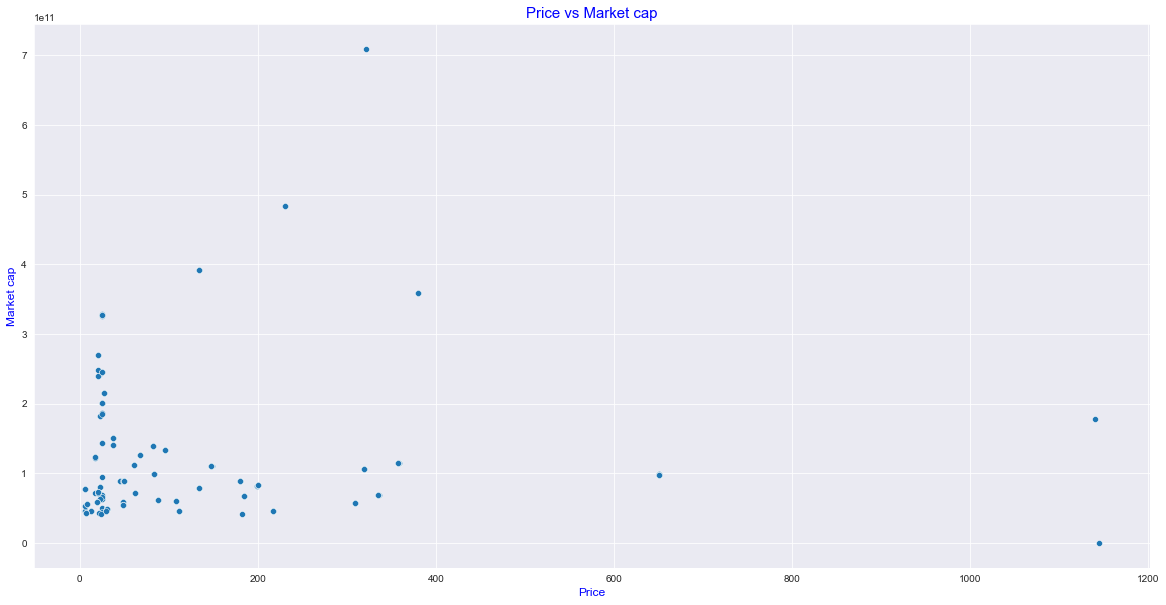

In [74]:
# price and market cap
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Price', y='market cap', data=df)
plt.title('Price vs Market cap', fontsize=15, c='b')
plt.xlabel('Price', fontsize=12, c='b')
plt.ylabel('Market cap', fontsize=12, c='b')
plt.show();

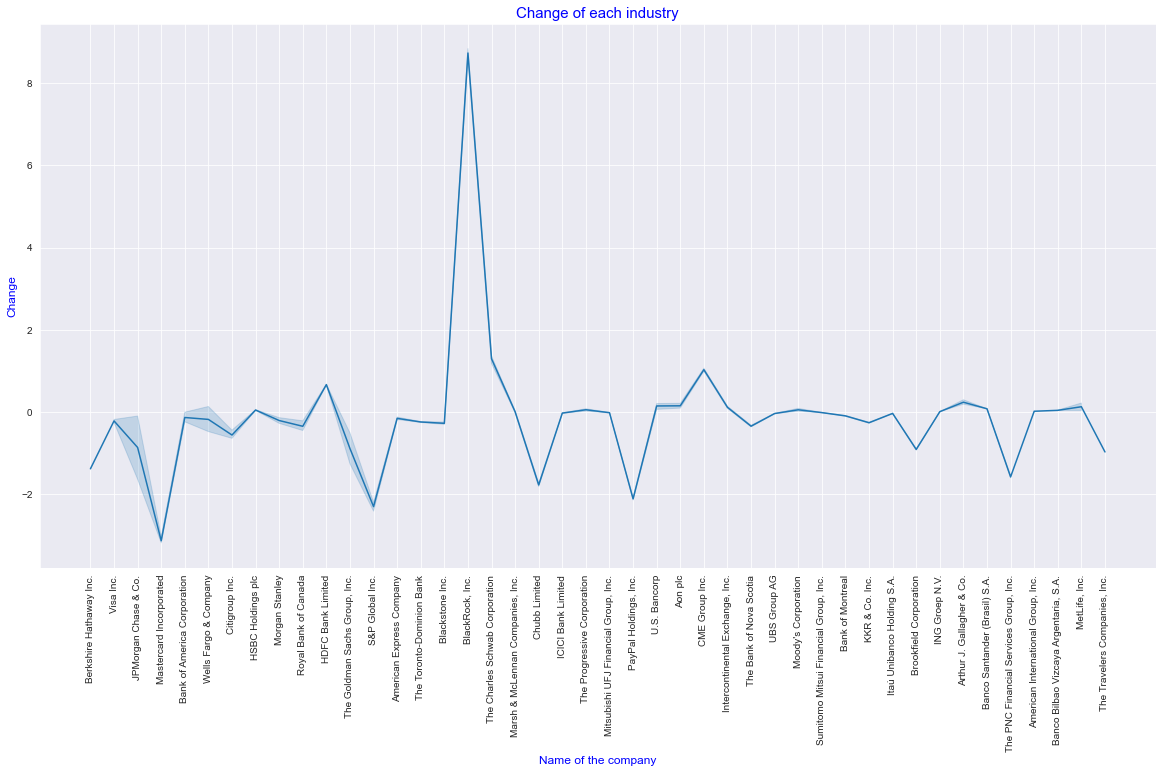

In [75]:
# Change 
plt.figure(figsize=(20, 10))
sns.lineplot(x='Name', y='Change', data=df)
plt.title('Change of each industry', fontsize=15, c='b')
plt.xlabel('Name of the company', fontsize=12, c='b')
plt.ylabel('Change', fontsize=12, c='b')
plt.xticks(rotation=90)
plt.show();

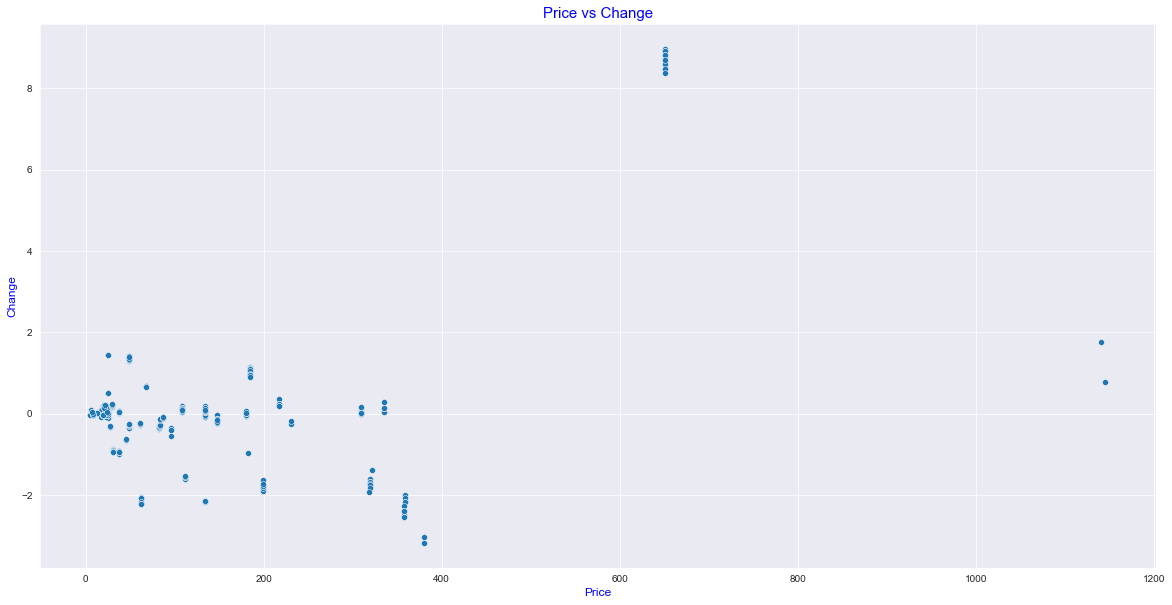

In [76]:
# price and change
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Price', y='Change', data=df)
plt.title('Price vs Change', fontsize=15, c='b')
plt.xlabel('Price', fontsize=12, c='b')
plt.ylabel('Change', fontsize=12, c='b')
plt.show();

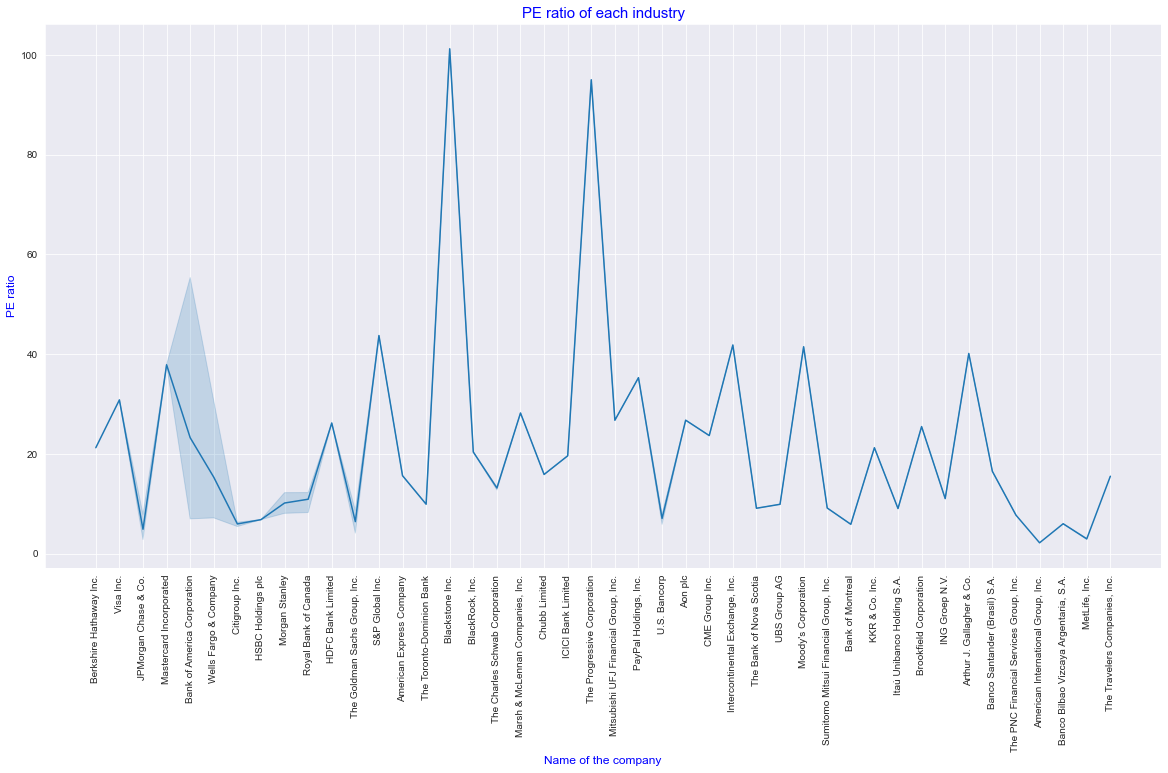

In [77]:
# PE ratio
plt.figure(figsize=(20, 10))
sns.lineplot(x='Name', y='PE_ratio', data=df)
plt.title('PE ratio of each industry', fontsize=15, c='b')
plt.xlabel('Name of the company', fontsize=12, c='b')
plt.ylabel('PE ratio', fontsize=12, c='b')
plt.xticks(rotation=90)
plt.show();

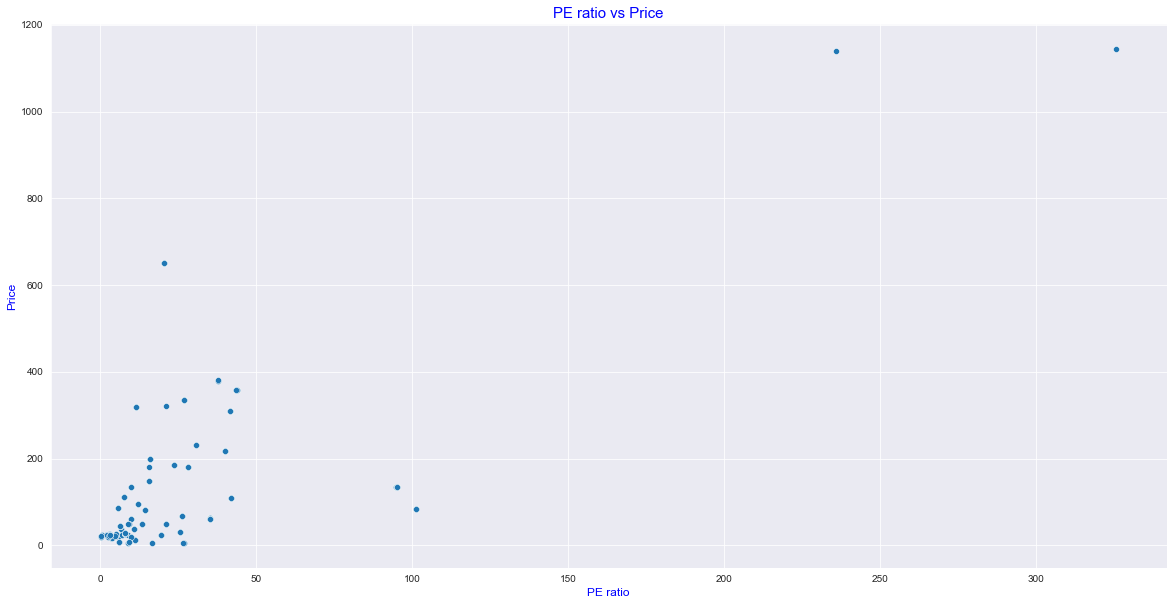

In [78]:
# PE ratio and price
plt.figure(figsize=(20, 10))
sns.scatterplot(x='PE_ratio', y='Price', data=df)
plt.title('PE ratio vs Price', fontsize=15, c='b')
plt.xlabel('PE ratio', fontsize=12, c='b')
plt.ylabel('Price', fontsize=12, c='b')
plt.show();

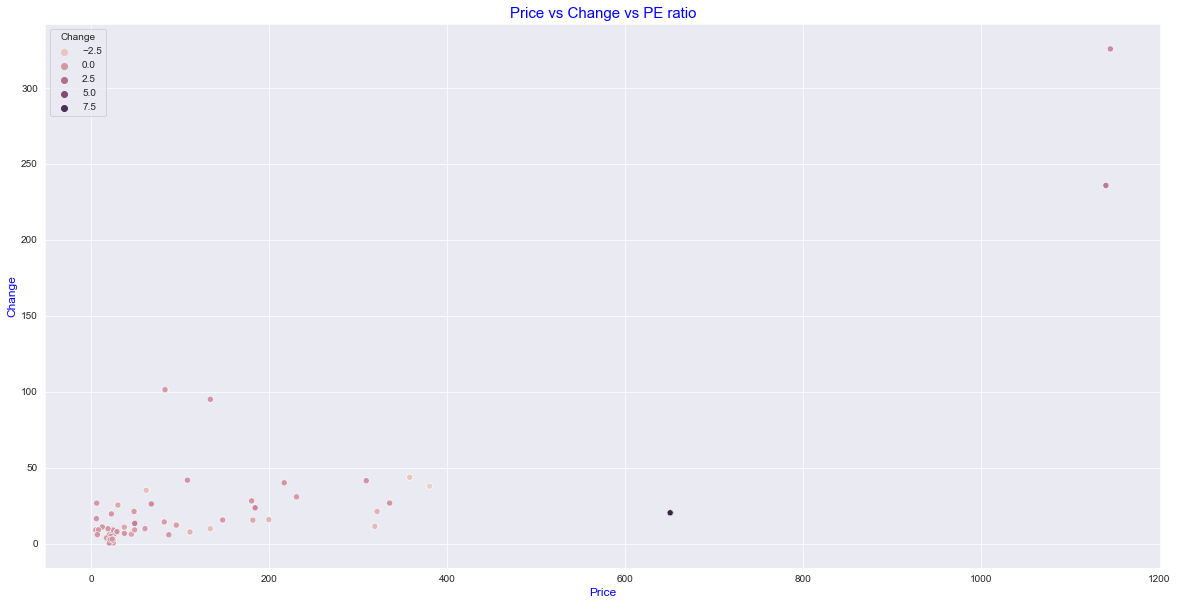

In [79]:
# Price v Change v PE ratio
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Price', y='PE_ratio', hue='Change', data=df)
plt.title('Price vs Change vs PE ratio', fontsize=15, c='b')
plt.xlabel('Price', fontsize=12, c='b')
plt.ylabel('Change', fontsize=12, c='b')
plt.show();

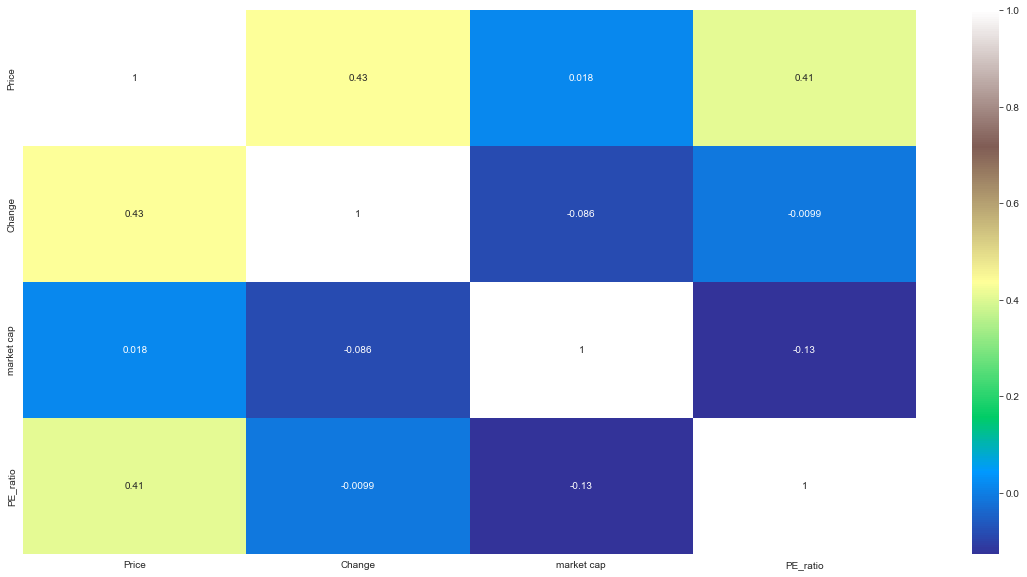

In [80]:
# Correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='terrain')
plt.show();